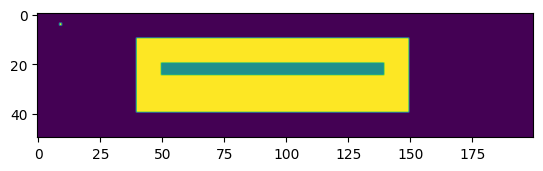

(50, 200)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
alto = 50
ancho = 200
array = np.zeros((alto,ancho))
array[4,9]=1
array[10:40 , 40:150]=1
array[20:25 , 50:140] = 0.5
plt.imshow(array)
plt.show()
array.shape

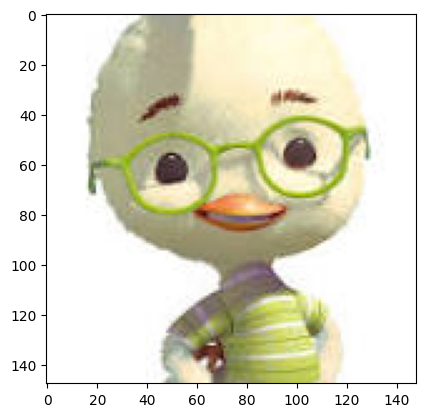

In [10]:
import numpy as np
import matplotlib.pyplot as plt
arch='./chicken.jpg'
img_tmp=plt.imread(arch)
plt.imshow(img_tmp)
plt.show()

In [11]:
type(img_tmp)

numpy.ndarray

In [12]:
img_tmp.shape

(148, 148, 3)

In [13]:
img_tmp[125,110]

array([151, 156, 115], dtype=uint8)

In [14]:
img_tmp.max(),img_tmp.min()

(255, 0)

(148, 148)


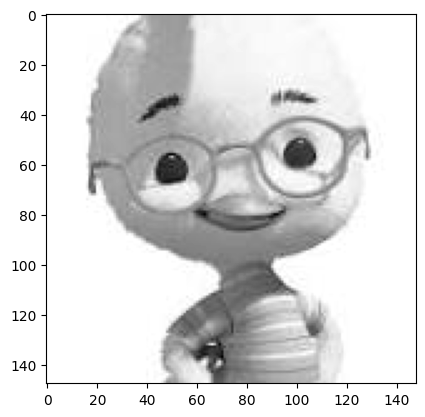

In [17]:
import cv2
import numpy as np
img_tmp2=cv2.imread(arch,0)
print(img_tmp2.shape)
plt.imshow(img_tmp2, cmap='gray')

In [18]:
img=img_tmp2
h,w=img.shape
img.shape

(148, 148)

In [20]:
# prompt: please, resape img to (None,148,148)

img_reshaped = cv2.resize(img, (148, 148))
img_resized= img_reshaped.reshape(1, 148, 148)
img_resized.shape

(1, 148, 148)

In [23]:
import tensorflow as tf
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import numpy as np

148 148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


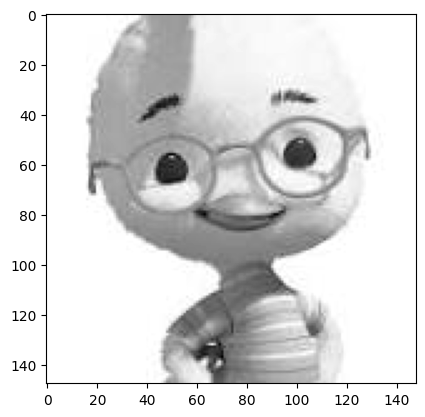

In [31]:
h,w=img.shape
print(h,w)

input_img=Input(shape=(h,w,1))
x = Conv2D(1,(1, 1), activation='relu', padding='same')(input_img)
modelo1 = Model(input_img, x)

modelo1.set_weights([np.array([[[[100.0]]]],dtype=np.float32),np.array([-50.0],dtype=np.float32)])

imagen=modelo1.predict(img_resized)

plt.imshow(imagen.reshape(h,w), cmap='gray')
plt.show()

MAX POOLING

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


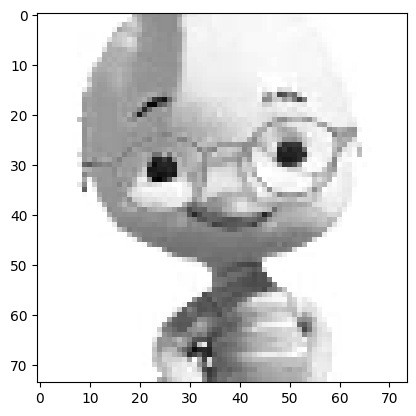

In [33]:
x = Conv2D(1,(1, 1), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
modelo2 = Model(input_img, x)

modelo2.set_weights([np.array([[[[100.0]]]],dtype=np.float32),np.array([-50.0],dtype=np.float32)])

plt.imshow(modelo2.predict(img_resized).reshape(h//2,w//2), cmap='gray')
plt.show()

arreglo 2 2 2 (2, 2, 1, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


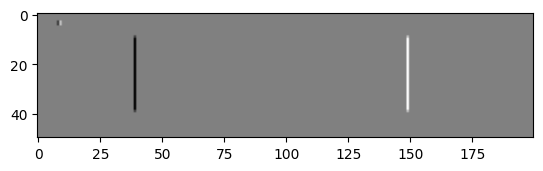

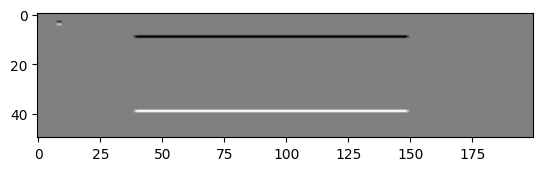

In [48]:
import numpy as np
import matplotlib.pyplot as plt
alto = 50
ancho = 200
cuadro = np.zeros((alto,ancho))
cuadro[4,9]=1
cuadro[10:40 , 40:150]=1


h,w=cuadro.shape
input_img2=Input(shape=(h,w,1))


x=Conv2D(2, (2, 2), activation='linear', padding='same')(input_img2)
modelo3=Model(input_img2,x)

filtro1=[
    [1,-1],
    [1,-1]
]
filtro2=[
    [1,1],
    [-1,-1]
]

def reformar_filtros(filtros):
  l=len(filtros)
  m=len(filtros[0])
  n=len(filtros[0][0])
  salida=np.zeros((m,n,1,l))
  print('arreglo',l,n,m,salida.shape)
  for i in range(l):
    for j in range(m):
      for k in range(n):
        #print('ijk',i,j,k,filtros[i][j][k])
        salida[j,k,0,i]=filtros[i][j][k]
  return salida

filtros=reformar_filtros([filtro1,filtro2])

modelo3.set_weights([filtros,np.array([0,0],dtype=np.float32)])

reshaped_cuadro=cuadro.reshape(1,h,w,1)
img_tmp4=modelo3.predict(reshaped_cuadro)
img_tmp4.shape

img1= np.reshape(img_tmp4[:,:,:,0],(h,w))
img2= np.reshape(img_tmp4[:,:,:,1],(h,w))

plt.imshow(img1, cmap='gray')
plt.show()

plt.imshow(img2, cmap='gray')
plt.show()

arreglo 3 3 3 (3, 3, 1, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


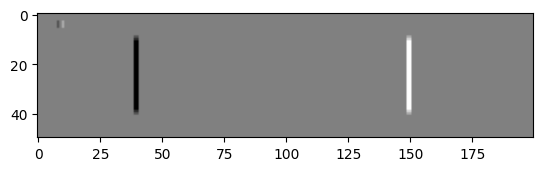

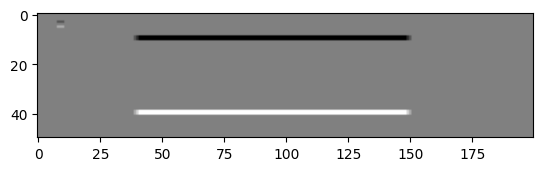

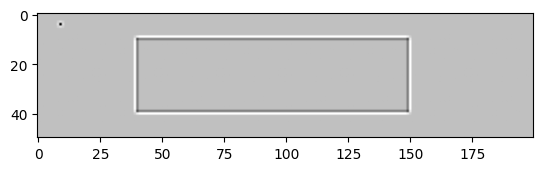

In [52]:
import numpy as np
import matplotlib.pyplot as plt
alto = 50
ancho = 200
cuadro = np.zeros((alto,ancho))
cuadro[4,9]=1
cuadro[10:40 , 40:150]=1


h,w=cuadro.shape
input_img2=Input(shape=(h,w,1))


x=Conv2D(3, (3, 3), activation='linear', padding='same')(input_img2)
modelo4=Model(input_img2,x)

filtro1=[
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
]
filtro2=[
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
]
filtro3=[
    [1,2,1],
    [2,-12,2],
    [1,2,1]
]

def reformar_filtros(filtros):
  l=len(filtros)
  m=len(filtros[0])
  n=len(filtros[0][0])
  salida=np.zeros((m,n,1,l))
  print('arreglo',l,n,m,salida.shape)
  for i in range(l):
    for j in range(m):
      for k in range(n):
        #print('ijk',i,j,k,filtros[i][j][k])
        salida[j,k,0,i]=filtros[i][j][k]
  return salida

filtros=reformar_filtros([filtro1,filtro2,filtro3])

modelo4.set_weights([filtros,np.array([0,0,0],dtype=np.float32)])

reshaped_cuadro=cuadro.reshape(1,h,w,1)
img_tmp4=modelo4.predict(reshaped_cuadro)
img_tmp4.shape

img1= np.reshape(img_tmp4[:,:,:,0],(h,w))
img2= np.reshape(img_tmp4[:,:,:,1],(h,w))
img3= np.reshape(img_tmp4[:,:,:,2],(h,w))

plt.imshow(img1, cmap='gray')
plt.show()

plt.imshow(img2, cmap='gray')
plt.show()

plt.imshow(img3, cmap='gray')
plt.show()